In [1]:
import sys
sys.path.append('../..')
import src.data.data_loader as dl
from src.features.vectorizer import Vectorizer
from src.models.topic_models import TopicModel
import src.visualization.visualize_tm as vis

C:\Users\Maria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Load comments for german and english articles

In [2]:
german = "german"
editorial = 'editorial'
data_gf = dl.get_forum_threads_by_language(german)
texts_forum_g = data_gf['thread_texts']

data_ge = dl.get_comments_by_type(german, editorial)
texts_editorial_g = data_ge['comment_texts']

concatenated_g = texts_forum_g + texts_editorial_g

In [3]:
# Data 
english = 'english'
data = dl.get_forum_threads_by_language(english)
texts_forum = data['thread_texts']

data = dl.get_comments_by_type(english, editorial)
texts_editorial = data['comment_texts']

concatenated = texts_forum + texts_editorial

### Load all topic models

In [4]:
topic_number = 25
lda_list = []
while topic_number <250: 
    lda =TopicModel.load("finalize_topicmodels/lda/lda_english_comments_combined_final_comments_"+ str(topic_number)+".pkl")
    lda_list.append(lda)
    topic_number = topic_number +25

In [5]:
topic_number_g = 25
lda_list_g = []
while topic_number_g <250: 
    lda =TopicModel.load("finalize_topicmodels/lda/lda_german_comments_combined_final_comments_"+ str(topic_number_g)+".pkl")
    lda_list_g.append(lda)
    topic_number_g = topic_number_g +25

In [6]:
topic_number_n = 25
nmf_list = []
while topic_number_n <250: 
    nmf =TopicModel.load("finalize_topicmodels/nmf/nmf_english_comments_combined_final_comments_"+ str(topic_number_n)+".pkl")
    nmf_list.append(nmf)
    topic_number_n = topic_number_n +25

In [36]:
topic_number_ng = 25
nmf_list_g = []
while topic_number_ng <250: 
    nmf_g =TopicModel.load("finalize_topicmodels/nmf/nmf_german_comments_combined_final_comments_"+ str(topic_number_ng)+".pkl")
    nmf_list_g.append(nmf_g)
    topic_number_ng = topic_number_ng +25

### Load Vectorizer

In [9]:
vec_lda_e = Vectorizer.load("vectorizer/lda_english_comments_combined_final.pkl")
vec_lda_g = Vectorizer.load("vectorizer/lda_german_comments_combined_final.pkl")
vec_nmf_e = Vectorizer.load("vectorizer/nmf_english_comments_combined_final.pkl")
vec_nmf_g = Vectorizer.load("vectorizer/nmf_german_comments_combined_final.pkl")


#### Print doc term matrices

In [37]:
lda_document_term_matrix = vec_lda_e.get_document_token_matrix(concatenated)
print(lda_document_term_matrix.shape)

lda_document_term_matrix_g = vec_lda_g.get_document_token_matrix(concatenated_g)
print(lda_document_term_matrix_g.shape)

nmf_document_term_matrix = vec_nmf_e.get_document_token_matrix(concatenated)
print(nmf_document_term_matrix.shape)

nmf_document_term_matrix_g = vec_nmf_g.get_document_token_matrix(concatenated_g)
print(nmf_document_term_matrix_g.shape)

(3715, 7078)
(2423, 12501)
(3715, 7078)
(2423, 12501)


#### doc topic matrices for lda

In [11]:
###english
lda_doc_topic_matrices = []
for mid, model in enumerate(lda_list):
    document_topic_matrix = model.get_document_topic_matrix(lda_document_term_matrix)
    lda_doc_topic_matrices.append(document_topic_matrix)

###german
lda_doc_topic_matrices_g = []
for mid, model in enumerate(lda_list_g):
    document_topic_matrix = model.get_document_topic_matrix(lda_document_term_matrix_g)
    lda_doc_topic_matrices_g.append(document_topic_matrix)

#### doc topic matrices for nmf

In [38]:
nmf_doc_topic_matrices = []    
for mid, model in enumerate(nmf_list):
    document_topic_matrix = model.get_document_topic_matrix(nmf_document_term_matrix)
    nmf_doc_topic_matrices.append(document_topic_matrix)
    
nmf_doc_topic_matrices_g = []    
for mid, model in enumerate(nmf_list_g):
    document_topic_matrix = model.get_document_topic_matrix(nmf_document_term_matrix_g)
    nmf_doc_topic_matrices_g.append(document_topic_matrix)

Epoch 10 reached after 0.087 seconds, error: 2721.665257
Epoch 20 reached after 0.119 seconds, error: 2673.451899
Epoch 30 reached after 0.154 seconds, error: 2663.706777
Epoch 40 reached after 0.186 seconds, error: 2660.227386
Epoch 50 reached after 0.214 seconds, error: 2658.608073
Epoch 60 reached after 0.252 seconds, error: 2657.730307
Epoch 70 reached after 0.276 seconds, error: 2657.204739
Epoch 80 reached after 0.298 seconds, error: 2656.867018
Epoch 90 reached after 0.330 seconds, error: 2656.638275
Epoch 100 reached after 0.361 seconds, error: 2656.476957
Epoch 110 reached after 0.385 seconds, error: 2656.359515
Epoch 120 reached after 0.415 seconds, error: 2656.271789
Epoch 130 reached after 0.436 seconds, error: 2656.204850
Epoch 140 reached after 0.458 seconds, error: 2656.152840
Epoch 150 reached after 0.480 seconds, error: 2656.111794
Epoch 160 reached after 0.511 seconds, error: 2656.078956
Epoch 170 reached after 0.537 seconds, error: 2656.052368
Epoch 180 reached after

C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Epoch 10 reached after 0.149 seconds, error: 2393.533509
Epoch 20 reached after 0.221 seconds, error: 2315.534710
Epoch 30 reached after 0.286 seconds, error: 2298.423302
Epoch 40 reached after 0.365 seconds, error: 2291.960447
Epoch 50 reached after 0.463 seconds, error: 2288.743516
Epoch 60 reached after 0.542 seconds, error: 2286.883393
Epoch 70 reached after 0.613 seconds, error: 2285.711483
Epoch 80 reached after 0.676 seconds, error: 2284.930431
Epoch 90 reached after 0.738 seconds, error: 2284.386898
Epoch 100 reached after 0.803 seconds, error: 2283.995376
Epoch 110 reached after 0.875 seconds, error: 2283.705254
Epoch 120 reached after 0.934 seconds, error: 2283.485054
Epoch 130 reached after 0.996 seconds, error: 2283.314422
Epoch 140 reached after 1.051 seconds, error: 2283.179767
Epoch 150 reached after 1.117 seconds, error: 2283.071775
Epoch 160 reached after 1.179 seconds, error: 2282.983912
Epoch 170 reached after 1.247 seconds, error: 2282.911505
Epoch 180 reached after

Epoch 40 reached after 1.728 seconds, error: 1478.581420
Epoch 50 reached after 2.079 seconds, error: 1465.439294
Epoch 60 reached after 2.438 seconds, error: 1458.078213
Epoch 70 reached after 2.805 seconds, error: 1453.596388
Epoch 80 reached after 3.155 seconds, error: 1450.671819
Epoch 90 reached after 3.535 seconds, error: 1448.638130
Epoch 100 reached after 3.872 seconds, error: 1447.151448
Epoch 110 reached after 4.227 seconds, error: 1446.024264
Epoch 120 reached after 4.609 seconds, error: 1445.145164
Epoch 130 reached after 4.965 seconds, error: 1444.444023
Epoch 140 reached after 5.309 seconds, error: 1443.874554
Epoch 150 reached after 5.656 seconds, error: 1443.404390
Epoch 160 reached after 6.006 seconds, error: 1443.010340
Epoch 170 reached after 6.351 seconds, error: 1442.675689
Epoch 180 reached after 6.706 seconds, error: 1442.388203
Epoch 190 reached after 7.051 seconds, error: 1442.138749
Epoch 200 reached after 7.399 seconds, error: 1441.920329
Epoch 10 reached aft

Epoch 110 reached after 3.304 seconds, error: 40.872466
Epoch 120 reached after 3.564 seconds, error: 40.872458
Epoch 130 reached after 3.840 seconds, error: 40.872451
Epoch 140 reached after 4.103 seconds, error: 40.872447
Epoch 150 reached after 4.375 seconds, error: 40.872443
Epoch 160 reached after 4.640 seconds, error: 40.872440
Epoch 170 reached after 4.894 seconds, error: 40.872438
Epoch 180 reached after 5.185 seconds, error: 40.872437
Epoch 190 reached after 5.469 seconds, error: 40.872435
Epoch 200 reached after 5.737 seconds, error: 40.872434
Epoch 10 reached after 1.053 seconds, error: 40.407977
Epoch 20 reached after 1.413 seconds, error: 40.385921
Epoch 30 reached after 1.730 seconds, error: 40.382404
Epoch 40 reached after 2.057 seconds, error: 40.381432
Epoch 50 reached after 2.374 seconds, error: 40.381063
Epoch 60 reached after 2.677 seconds, error: 40.380893
Epoch 70 reached after 2.990 seconds, error: 40.380803
Epoch 80 reached after 3.315 seconds, error: 40.380752


In [13]:
print(nmf_doc_topic_matrices)
print(nmf_doc_topic_matrices_g)

[array([[6.73817473e-002, 9.10710405e-015, 1.08248488e-001, ...,
        2.27143119e-032, 7.33423520e-002, 4.47403707e-002],
       [3.59012956e-001, 1.13915260e-063, 5.50187504e-142, ...,
        3.79191055e-044, 3.99347589e-012, 1.80081216e-069],
       [1.52531529e-001, 1.13917289e-004, 1.95870195e-003, ...,
        1.76701372e-001, 8.70666289e-061, 1.78613873e-029],
       ...,
       [4.87483861e-114, 3.49751942e-120, 9.36344422e-195, ...,
        0.00000000e+000, 2.48164096e-066, 2.68999415e-002],
       [7.45470630e-111, 5.93858665e-011, 1.80939386e-018, ...,
        1.73786873e-025, 1.23459568e-037, 2.04191817e-046],
       [1.07235476e-209, 1.50786942e-114, 1.46688615e-002, ...,
        1.15456728e-039, 5.36339544e-042, 1.46160974e-081]]), array([[3.45638568e-002, 2.70101432e-027, 5.82585213e-003, ...,
        2.22221093e-018, 7.31892366e-025, 7.86838524e-062],
       [2.66104205e-001, 5.09662926e-084, 2.42611449e-193, ...,
        9.46258068e-002, 8.08513637e-014, 3.58307043e

### LDA Model

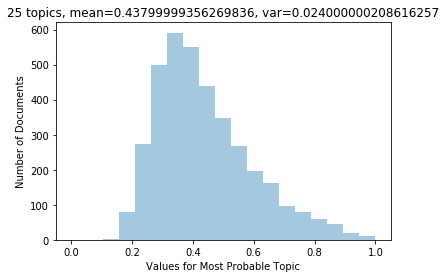

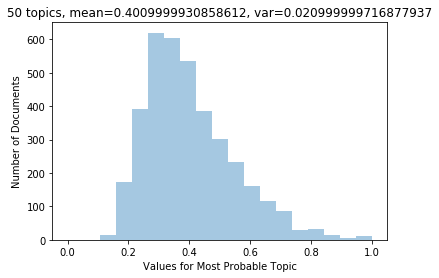

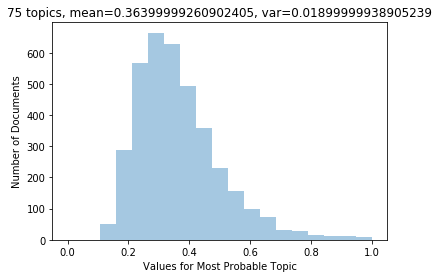

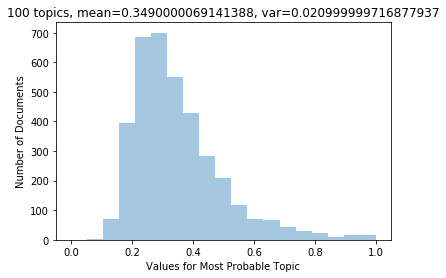

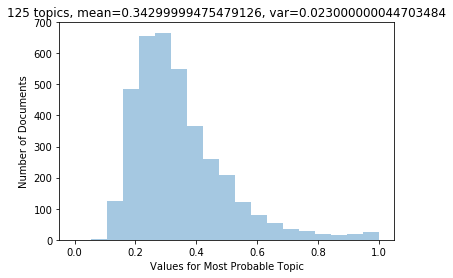

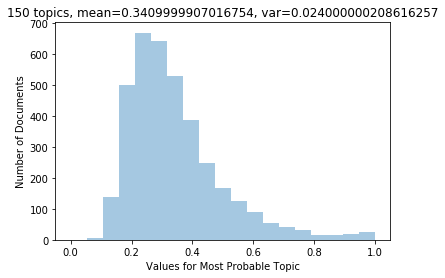

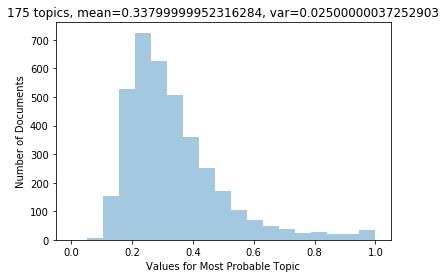

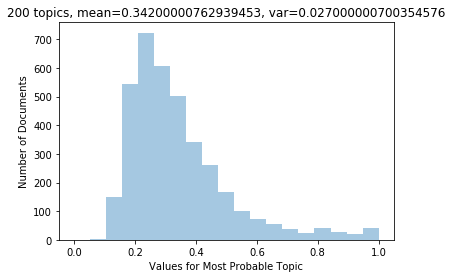

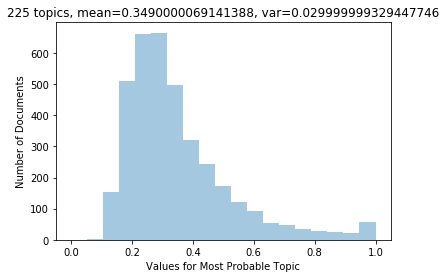

In [14]:
for lda_doc_topic in lda_doc_topic_matrices:
    vis.plot_topic_max_probability_distribution(lda_doc_topic)

In [15]:
num_topics = range(25,250,25)

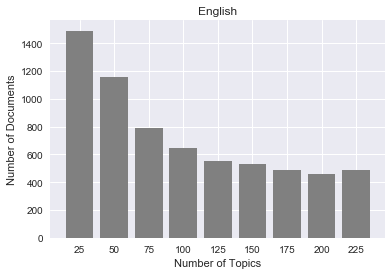

In [25]:
vis.plot_document_counts_per_run(lda_list, lda_doc_topic_matrices, num_topics, 0.45, 'English', 'english lda.pdf')

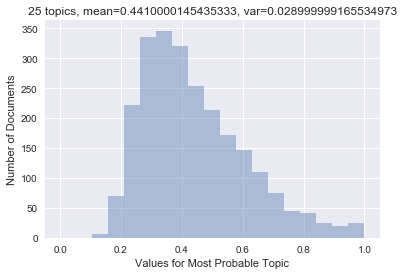

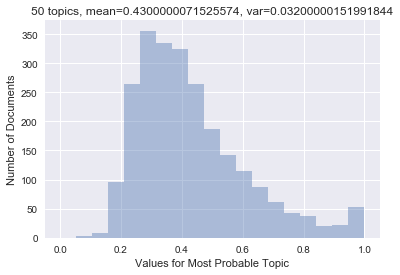

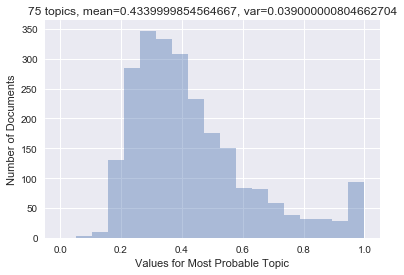

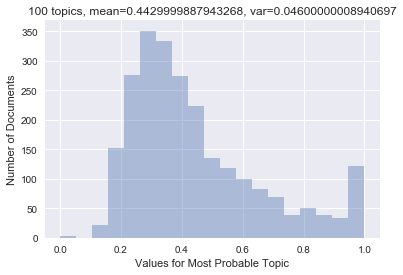

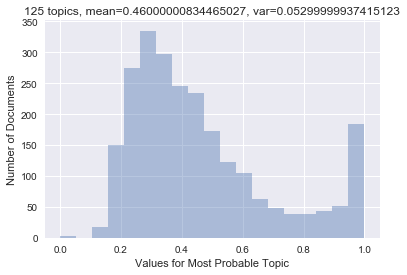

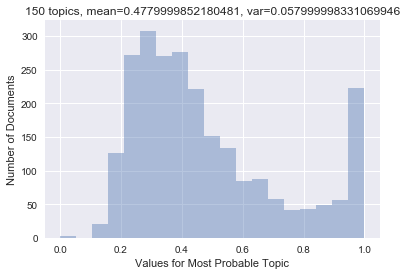

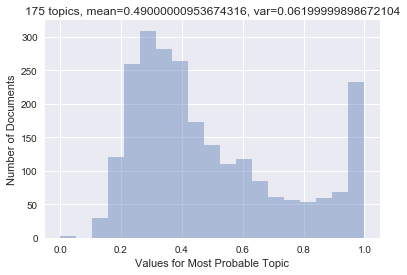

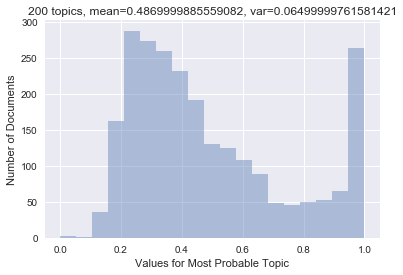

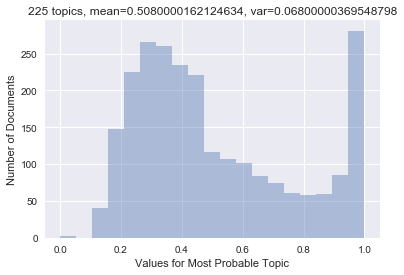

In [17]:
for lda_doc_topic in lda_doc_topic_matrices_g:
    vis.plot_topic_max_probability_distribution(lda_doc_topic)

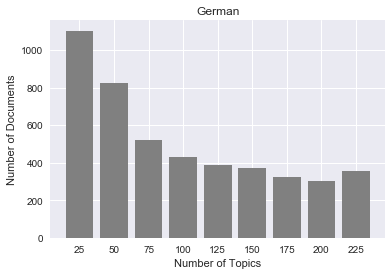

In [26]:
vis.plot_document_counts_per_run(lda_list_g, lda_doc_topic_matrices, num_topics, 0.5, 'German', 'german lda.pdf')

### NMF Model

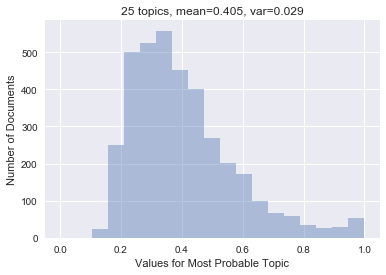

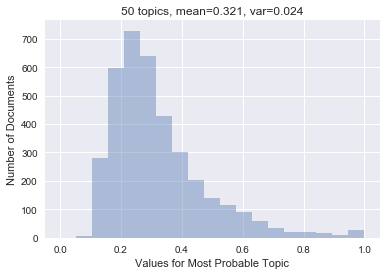

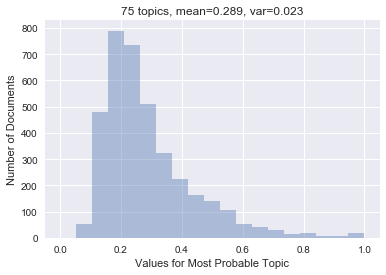

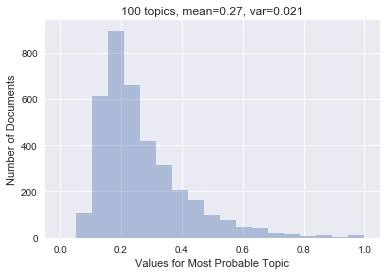

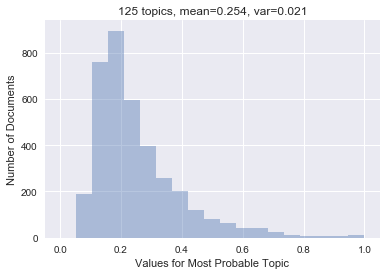

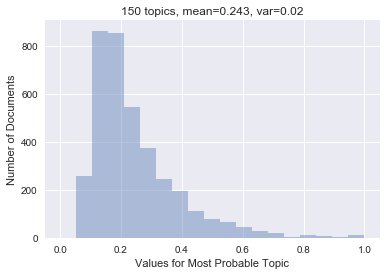

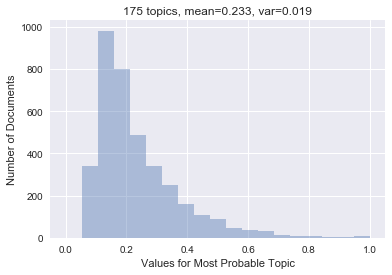

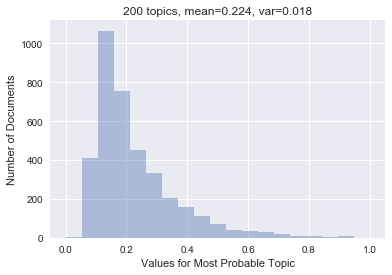

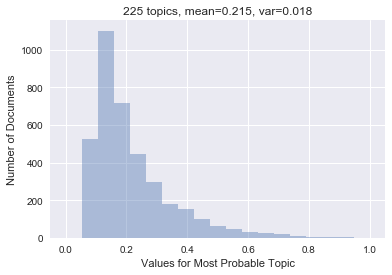

In [24]:
for nmf_doc_topic in nmf_doc_topic_matrices:
    vis.plot_topic_max_probability_distribution(nmf_doc_topic)

In [20]:
num_topics = range(25,250,25)

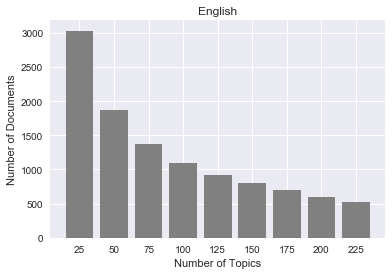

In [28]:
vis.plot_document_counts_per_run(nmf_list, nmf_doc_topic_matrices, num_topics, 0.3, 'English', 'english nmf.pdf')

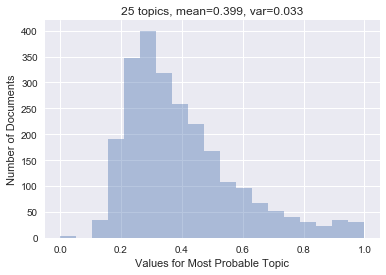

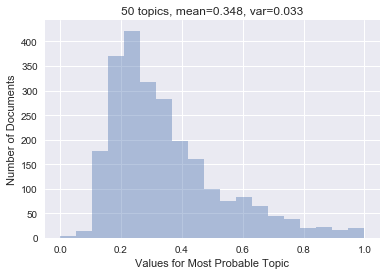

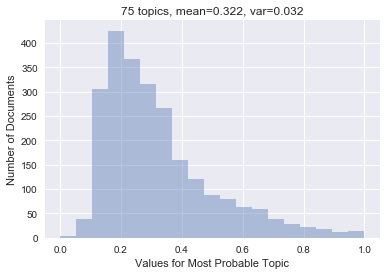

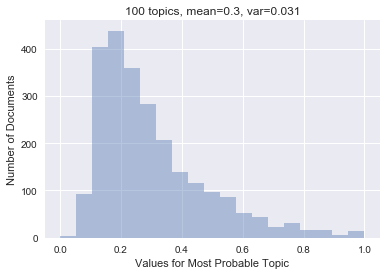

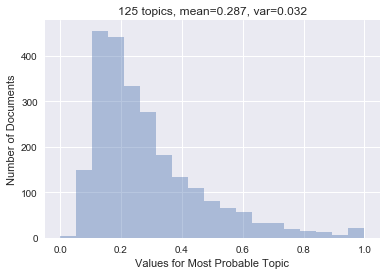

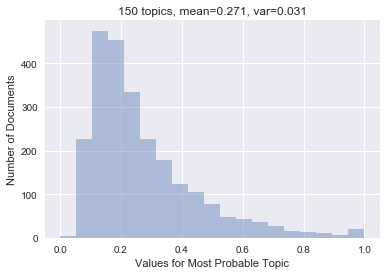

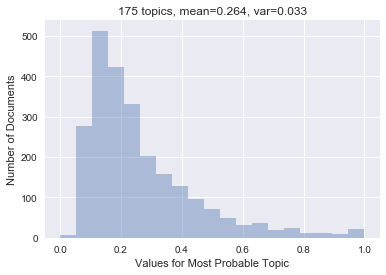

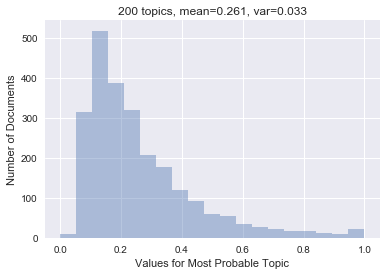

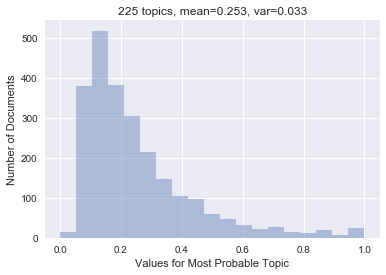

In [39]:
for nmf_doc_topic in nmf_doc_topic_matrices_g:
    vis.plot_topic_max_probability_distribution(nmf_doc_topic)

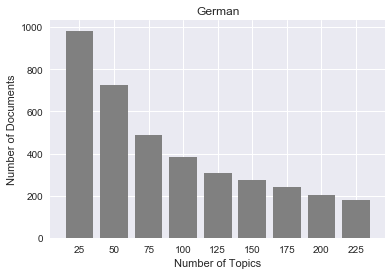

In [40]:
vis.plot_document_counts_per_run(nmf_list_g, nmf_doc_topic_matrices_g, num_topics, 0.4, 'German', 'german nmf.pdf')